In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
dic = {i + 404 : chr(i) for i in range(ord('a'), ord('z') + 1)}
dic[0] = ' '

In [7]:
def un_symbol(filename):
    x, Fe = sf.read(filename)
    l = 20*Fe 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]
    while round(v_max) < 501 or round(v_max) > 526:
        t = [i/8000 for i in range(2000)]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*a_max/len(x)*2
        x = x - bruit
        X = np.fft.fft(x,l)
        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
    return dic[round(v_max)]

In [8]:
un_symbol('symboleA.wav'),un_symbol('symboleA2.wav'),un_symbol('symboleU.wav'),un_symbol('symboleU2.wav')

('a', 'a', 'u', 'u')

In [9]:
def un_symbol(x, Fe):
    l = 100*Fe 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]
    while round(v_max) < 501 or round(v_max) > 526:
        t = [i/8000 for i in range(2000)]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*a_max/len(x)*2
        x = x - bruit
        X = np.fft.fft(x,l)
        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
    return round(v_max)

def des_symbols(filename):
    result = ''
    x, Fe = sf.read(filename)
    N = int(len(x)/2500)
    for i in range(N):
        x_ = x[i*2500:(i+1)*2500-500]
        result+=dic[un_symbol(x_,Fe)]
    return result

In [10]:
des_symbols('mess_ssespace.wav')

'cestpasmal'

# Avec espace

tried to eliminate useless signal one by one but it didn't work

(480.0, 550.0)

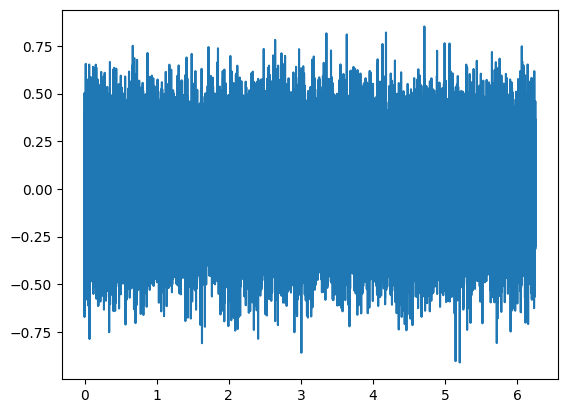

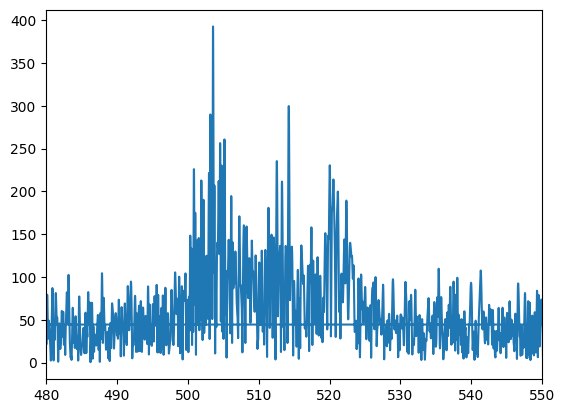

In [18]:
x, Fe = sf.read('mess.wav')

plt.figure()
t = [i/Fe for i in range(len(x))]
plt.plot(t,x)

plt.figure()
X = np.fft.fft(x,len(x)*20)
v = np.fft.fftfreq(len(X),1/Fe)
plt.plot(v,abs(X))
plt.xlim([480,550])

KeyboardInterrupt: 

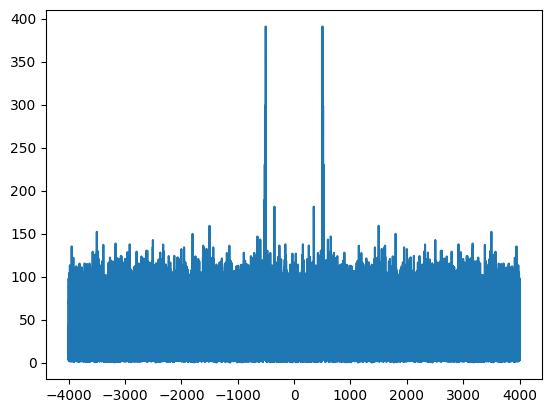

In [22]:
def un_symbol(x, Fe):
    if sum(abs(x)) < 10:
        return 0
    l = 100*Fe 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]
    while round(v_max) < 501 or round(v_max) > 526:
        t = [i/8000 for i in range(2000)]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*a_max/len(x)*2
        x = x - bruit
        X = np.fft.fft(x,l)
        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
    return round(v_max)

def des_symbols_espace(x,Fe):
    l = 10*len(x) 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    plt.figure()
    plt.plot(v,abs(X))
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]
    while round(v_max) < 501 or round(v_max) > 526:
        print("a_max = ",a_max,"v_max = ",v_max,"imag = ",np.imag(X[n]),"real = ",np.real(X[n]))
        print("a_max = ",a_max,"v_max = ",v_max,"imag = ",np.imag(X[-n]),"real = ",np.real(X[-n]))
        t = [i/8000 for i in range(len(x))]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*(np.imag(X[n]))/len(x)*2 + np.cos([2*np.pi*v_max*i for i in t])*(np.real(X[n]))/len(x)*2
        x = x - bruit
        X = np.fft.fft(x,l)
        plt.figure()
        plt.plot(v,abs(X))
        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
    result = []
    N = int(len(x)/2500)
    for i in range(N):
        x_ = x[i*2500:(i+1)*2500-500]
        result.append(dic[un_symbol(x_,Fe)])    
    return result

des_symbols_espace(x,Fe)